In [5]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [9]:
# Loading Dataset

df = pd.read_csv(r"C:\Users\Muhammad Ali\Desktop\Devs Hub\insurance.csv")

print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


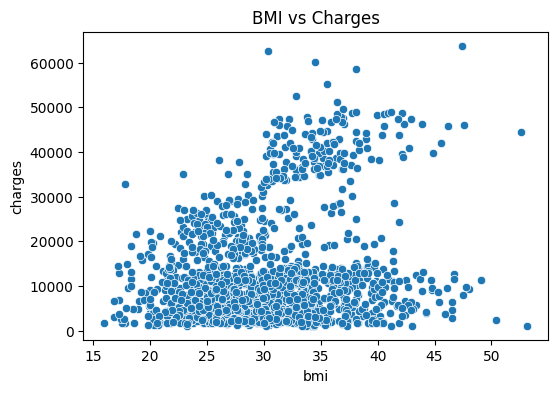

In [11]:
# BMI vs Charges

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="bmi", y="charges")
plt.title("BMI vs Charges")
plt.show()



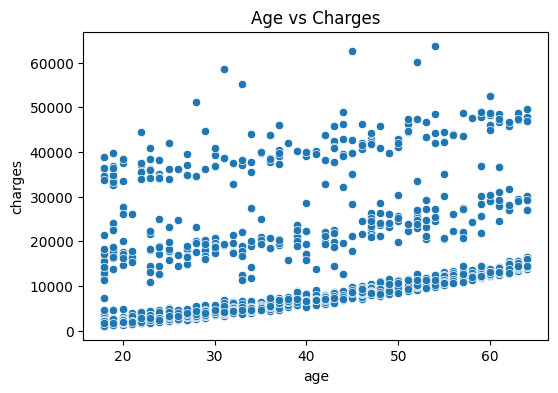

In [13]:
# Age vs Charges 
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="age", y="charges")
plt.title("Age vs Charges")
plt.show()



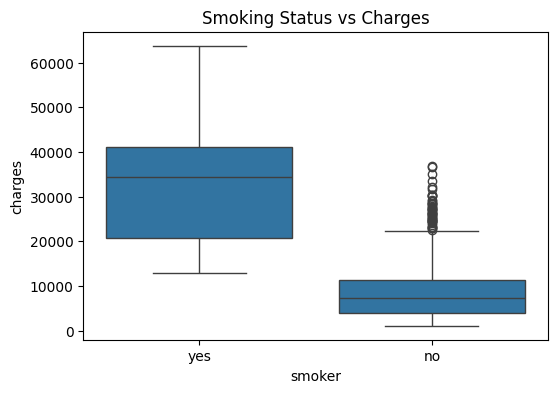

In [15]:
#Smoking Status vs Charges
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="smoker", y="charges")
plt.title("Smoking Status vs Charges")
plt.show()

In [17]:
# Feature Encoding

categorical_features = ["sex", "smoker", "region"]

ct = ColumnTransformer(
    transformers=[
        ("encoder", OneHotEncoder(drop="first"), categorical_features)
    ],
    remainder="passthrough"
)

X = df.drop("charges", axis=1)
y = df["charges"]

X = ct.fit_transform(X)

In [19]:
# Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
# Model Training

model = LinearRegression()
model.fit(X_train, y_train)

# ----------------------------

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
# Predictions

y_pred = model.predict(X_test)


In [24]:
# Evaluation (MAE & RMSE)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Evaluation:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Model Evaluation:
Mean Absolute Error (MAE): 4181.194473753659
Root Mean Squared Error (RMSE): 5796.284659276275
